In [1]:
import requests
import json
import pandas as pd
import os
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
import hvplot.pandas

pn.extension("plotly")

In [2]:
# key initiation
api_key = os.getenv("ATTOM_API_KEY")
type(api_key)

str

In [3]:
def get_data_from_attom(url,querystring):    
    headers = { 
        'accept': "application/json", 
        'apikey': api_key, 
    } 

    response = requests.request("GET", url, headers=headers, params=querystring)
    print (response.url)
    json_formatted=json.loads(response.text)

    return json_formatted

In [4]:
# Reading junction files from the database later DB

neighborhood_match_csv = Path("data/zipcodeMapping.csv")
neighborhood_junction_file = pd.read_csv(neighborhood_match_csv)
neighborhood_junction_file.head()

Borough            Neighborhood                          ZIP Codes
0  Brooklyn        Central Brooklyn  11212, 11213, 11216, 11233, 11238
1  Brooklyn      Southwest Brooklyn                11209, 11214, 11228
2  Brooklyn            Borough Park         11204, 11218, 11219, 11230
3  Brooklyn  Canarsie and Flatlands                11234, 11236, 11239
4  Brooklyn       Southern Brooklyn         11223, 11224, 11229, 11235

In [5]:
# break down all the zipcode and create a new datafram
# Data clean up to find all the zip codes.
# intialize an array with all the zip codes.
all_zipcodes =[]
def clean_up_and_collect_zip(neighborhood_junction_file,all_zipcodes):
    for index, row in neighborhood_junction_file.iterrows():
        result = isinstance(row["ZIP Codes"], list)
        if (not result):
            zip_code_boroughs = [x.strip() for x in (row["ZIP Codes"]).split(',')]
            all_zipcodes.append(["ZI" + x for x in zip_code_boroughs])
            row["ZIP Codes"] = zip_code_boroughs
        else:
            all_zipcodes = all_zipcodes + ["ZI" + x for x in row["ZIP Codes"]]
    #         dict_neighborhood[row["Neighborhood"]] = [row["Borough"],zipcodelist
    return all_zipcodes
all_zipcodes = clean_up_and_collect_zip(neighborhood_junction_file,all_zipcodes)
neighborhood_junction_file.head()

Borough            Neighborhood                            ZIP Codes
0  Brooklyn        Central Brooklyn  [11212, 11213, 11216, 11233, 11238]
1  Brooklyn      Southwest Brooklyn                [11209, 11214, 11228]
2  Brooklyn            Borough Park         [11204, 11218, 11219, 11230]
3  Brooklyn  Canarsie and Flatlands                [11234, 11236, 11239]
4  Brooklyn       Southern Brooklyn         [11223, 11224, 11229, 11235]

In [6]:
rent_data_csv = Path("data/Zip_Rent_2015.csv")
rent_data_csv = pd.read_csv(rent_data_csv)
rent_data_csv.head()

RegionID  RegionName      City State                             Metro  \
0     61639       10025  New York    NY       New York-Newark-Jersey City   
1     84654       60657   Chicago    IL          Chicago-Naperville-Elgin   
2     61637       10023  New York    NY       New York-Newark-Jersey City   
3     91982       77494      Katy    TX  Houston-The Woodlands-Sugar Land   
4     84616       60614   Chicago    IL          Chicago-Naperville-Elgin   

        CountyName  SizeRank  2015-01  2015-02  2015-03  ...  2019-04  \
0  New York County         1   3682.0   3767.0   3767.0  ...   3785.0   
1      Cook County         2   2016.0   2028.0   2033.0  ...   2039.0   
2  New York County         3      NaN   4011.0   3985.0  ...   3874.0   
3    Harris County         4   1945.0   1917.0   1906.0  ...   1765.0   
4      Cook County         5   2227.0   2232.0   2233.0  ...   2245.0   

   2019-05  2019-06  2019-07  2019-08  2019-09  2019-10  2019-11  2019-12  \
0   3788.0   3786.0   3784.0   3766.0   3779.0   3843.0   3873.0   3835.0   
1   2070.0   2105.0   2140.0   2168.0   2185.0   2125.0      NaN   2053.0   
2   3898.0   3917.0   3929.0   3931.0   3963.0      NaN   4123.0   4079.0   
3   1755.0   1751.0   1752.0   1754.0   1759.0   1764.0   1769.0   1776.0   
4   2289.0   2332.0   2372.0   2398.0   2412.0   2348.0   2356.0   2311.0   

   2020-01  
0      NaN  
1   1996.0  
2      NaN  
3   1778.0  
4      NaN  

[5 rows x 68 columns]

In [7]:
cleaned_rent_data = rent_data_csv[rent_data_csv['City']=="New York"].drop(['2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12',
                   '2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-07','2016-08','2016-09','2016-10','2016-11','2016-12',
                   '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
                   '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12','2020-01',
                    'SizeRank','RegionID','Metro','State','City','CountyName']
                   ,axis=1)


cleaned_rent_data.dropna(inplace=True)
cleaned_rent_data.head()

RegionName  2019-01  2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  \
14       10016   3241.0   3263.0   3251.0   3242.0   3245.0   3256.0   3286.0   
17       11201   2779.0   2813.0   2827.0   2829.0   2835.0   2846.0   2872.0   
18       11235   2087.0   2079.0   2070.0   2068.0   2070.0   2079.0   2092.0   
19       11375   2086.0   2092.0   2083.0   2070.0   2060.0   2058.0   2059.0   
23       10029   3145.0   3197.0   3225.0   3258.0   3276.0   3268.0   3242.0   

    2019-08  2019-09  2019-10  2019-11  2019-12  
14   3315.0   3340.0   3403.0   3440.0   3390.0  
17   2892.0   2911.0   2914.0   2978.0   3038.0  
18   2097.0   2097.0   2147.0   2147.0   2085.0  
19   2058.0   2058.0   2114.0   2142.0   2105.0  
23   3225.0   3199.0   3198.0   3144.0   3184.0

In [8]:
# get the 2019 snapshot of average rent
col = cleaned_rent_data.loc[: , "2019-01":"2019-12"]
cleaned_rent_data.insert(2, "Average Rent 2019", col.mean(axis=1), True) 
cleaned_rent_data.drop(['2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12'
                                       ],axis=1,inplace=True)
cleaned_rent_data.head()

RegionName  Average Rent 2019
14       10016        3306.000000
17       11201        2877.833333
18       11235        2093.166667
19       11375        2082.083333
23       10029        3213.416667

In [9]:
cleaned_rent_data.rename(columns={'RegionName':'Zip Code'}, inplace=True)
cleaned_rent_data.set_index("Zip Code", inplace=True)

cleaned_rent_data.head()

Average Rent 2019
Zip Code                   
10016           3306.000000
11201           2877.833333
11235           2093.166667
11375           2082.083333
10029           3213.416667

In [10]:
# GET all the sales data

colnames = ["sno","Zip Code", "Date", "Num of Units Sold", "Average Sales", "Median Sales"]

# check to see if the file exists if so don't make API calls (because its a trial key we have limited usage)
def need_to_fetch_data():
    df=pd.DataFrame()
    path = Path('data/NYC_data.csv')
    if (path.exists()):
        print("File already exists no need to make expensive API calls")
        df = pd.read_csv(path, names=colnames, header=None)
    else: 
        print("BEGINNING THE API CALLS TO IMPORT DATA")
        
    return df


In [11]:
import time
sales_df = need_to_fetch_data()

# API REQUEST RESTRICTION: cannot make more than 7-9 requests a minute! Also they don't have bulk zipcode calls
# So put a sleep timer to collect the data

if(sales_df.empty):    
    url = "https://api.gateway.attomdata.com/propertyapi/v1.0.0/salestrend/snapshot"
    all_data_df = pd.DataFrame()
    for zipcode_list in all_zipcodes[41:42]:
        for zipcode in zipcode_list:
            print(zipcode)
            sale = []
            querystring = {"geoid":zipcode,"interval":"monthly","startyear":"2010","endyear":"2019","startmonth":"january","endmonth":"december"}
            print (querystring)
            json_formatted = get_data_from_attom(url,querystring)
            for row in json_formatted['salestrends']:
                location = row['location']['geoID']
                date = row['daterange']['start']
                homesalecount = row['SalesTrend']['homesalecount']
                avgsaleprice = row['SalesTrend']['avgsaleprice']
                medsaleprice = row['SalesTrend']['medsaleprice']     
                sale.append([location,date, homesalecount, avgsaleprice,medsaleprice])
            df = pd.DataFrame(columns=['location', 'date','homesalecount','avgsaleprice','medsaleprice'], data=sale)
            df['date']= pd.to_datetime(df['date']) 
            all_data_df.append(df)
            # df.set_index('date', inplace=True)
            filename = 'data/NYC_data.csv'
            # put it all in the csv file 
            df.to_csv(filename, mode='a', header=False)      
        time.sleep(40)


sales_df['Date']= pd.to_datetime(sales_df['Date'])
sales_df.tail()

File already exists no need to make expensive API calls


sno Zip Code       Date  Num of Units Sold  Average Sales  \
10370  10370  ZI11378 2019-08-01                 17         773059   
10371  10371  ZI11378 2019-09-01                  9         796543   
10372  10372  ZI11378 2019-10-01                 23         813887   
10373  10373  ZI11378 2019-11-01                 19         790448   
10374  10374  ZI11378 2019-12-01                 13         876808   

       Median Sales  
10370        800000  
10371        728000  
10372        770000  
10373        820000  
10374        885000

In [12]:
# Clean up date

#zip code format
sales_df['Zip Code'] = (sales_df['Zip Code']).str[2:]
sales_df.dropna(inplace=True)
sales_df
sales_df.drop(columns=['sno'], inplace=True)
sales_df.head()

Zip Code       Date  Num of Units Sold  Average Sales  Median Sales
0    11212 2015-01-01                 12        1551110        479375
1    11212 2015-02-01                 13        1148923        450000
2    11212 2015-03-01                 27        3250758        419967
3    11212 2015-05-01                 13         332615        330000
4    11212 2015-06-01                 16         787406        540000

In [13]:

list_of_boroughs = []
list_of_neighborhoods = []

# take the row get the zipcode
for x, row in sales_df.iterrows():
    zipcode = row[0].strip()
    region = [row for x, row in neighborhood_junction_file.iterrows() if zipcode in row['ZIP Codes']]
    if len(region) > 0:
         list_of_boroughs.append(region[0]['Borough'])
         list_of_neighborhoods.append(region[0]['Neighborhood'])

borough = pd.Series(list_of_boroughs)  
sales_df.insert(loc=0, column='Borough', value=borough)


neighborhood = pd.Series(list_of_neighborhoods)  
sales_df.insert(loc=1, column='Neighborhood', value=neighborhood)
sales_df


Borough      Neighborhood Zip Code       Date  Num of Units Sold  \
0      Brooklyn  Central Brooklyn    11212 2015-01-01                 12   
1      Brooklyn  Central Brooklyn    11212 2015-02-01                 13   
2      Brooklyn  Central Brooklyn    11212 2015-03-01                 27   
3      Brooklyn  Central Brooklyn    11212 2015-05-01                 13   
4      Brooklyn  Central Brooklyn    11212 2015-06-01                 16   
5      Brooklyn  Central Brooklyn    11212 2015-07-01                 14   
6      Brooklyn  Central Brooklyn    11212 2015-08-01                 18   
7      Brooklyn  Central Brooklyn    11212 2015-09-01                 18   
8      Brooklyn  Central Brooklyn    11212 2015-11-01                 15   
9      Brooklyn  Central Brooklyn    11212 2015-12-01                 18   
10     Brooklyn  Central Brooklyn    11212 2015-04-01                 12   
11     Brooklyn  Central Brooklyn    11212 2015-10-01                  7   
12     Brooklyn  Central Brooklyn    11212 2016-01-01                 12   
13     Brooklyn  Central Brooklyn    11212 2016-02-01                 14   
14     Brooklyn  Central Brooklyn    11212 2016-04-01                 19   
15     Brooklyn  Central Brooklyn    11212 2016-05-01                 12   
16     Brooklyn  Central Brooklyn    11212 2016-06-01                 13   
17     Brooklyn  Central Brooklyn    11212 2016-07-01                 13   
18     Brooklyn  Central Brooklyn    11212 2016-08-01                 15   
19     Brooklyn  Central Brooklyn    11212 2016-10-01                 15   
20     Brooklyn  Central Brooklyn    11212 2016-11-01                 13   
21     Brooklyn  Central Brooklyn    11212 2016-12-01                 10   
22     Brooklyn  Central Brooklyn    11212 2016-03-01                 18   
23     Brooklyn  Central Brooklyn    11212 2016-09-01                 12   
24     Brooklyn  Central Brooklyn    11212 2017-01-01                 14   
25     Brooklyn  Central Brooklyn    11212 2017-03-01                 15   
26     Brooklyn  Central Brooklyn    11212 2017-04-01                  9   
27     Brooklyn  Central Brooklyn    11212 2017-05-01                 13   
28     Brooklyn  Central Brooklyn    11212 2017-06-01                 17   
29     Brooklyn  Central Brooklyn    11212 2017-07-01                  7   
...         ...               ...      ...        ...                ...   
10345    Queens       West Queens    11378 2017-07-01                 16   
10346    Queens       West Queens    11378 2017-08-01                 24   
10347    Queens       West Queens    11378 2017-09-01                 18   
10348    Queens       West Queens    11378 2017-10-01                 22   
10349    Queens       West Queens    11378 2017-11-01                 14   
10350    Queens       West Queens    11378 2017-12-01                 23   
10351    Queens       West Queens    11378 2018-01-01                 13   
10352    Queens       West Queens    11378 2018-02-01                 15   
10353    Queens       West Queens    11378 2018-03-01                 13   
10354    Queens       West Queens    11378 2018-04-01                  7   
10355    Queens       West Queens    11378 2018-05-01                 10   
10356    Queens       West Queens    11378 2018-06-01                 25   
10357    Queens       West Queens    11378 2018-07-01                 12   
10358    Queens       West Queens    11378 2018-08-01                 26   
10359    Queens       West Queens    11378 2018-09-01                 18   
10360    Queens       West Queens    11378 2018-10-01                 21   
10361    Queens       West Queens    11378 2018-11-01                 20   
10362    Queens       West Queens    11378 2018-12-01                 14   
10363    Queens       West Queens    11378 2019-01-01                 21   
10364    Queens       West Queens    11378 2019-02-01                 10   
10365    Queens       West Queens    11378 2019-03-01   

In [14]:
sales_df.set_index('Date',inplace =True)
sales_df.tail()





Borough Neighborhood Zip Code  Num of Units Sold  Average Sales  \
Date                                                                         
2019-08-01  Queens  West Queens    11378                 17         773059   
2019-09-01  Queens  West Queens    11378                  9         796543   
2019-10-01  Queens  West Queens    11378                 23         813887   
2019-11-01  Queens  West Queens    11378                 19         790448   
2019-12-01  Queens  West Queens    11378                 13         876808   

            Median Sales  
Date                      
2019-08-01        800000  
2019-09-01        728000  
2019-10-01        770000  
2019-11-01        820000  
2019-12-01        885000

In [15]:
from urllib.request import urlopen
import json

with open('data/nyc_zip_code_tabulation_areas_polygons.geojson') as f:
    counties = json.load(f)
df = sales_df

Borough      Neighborhood Zip Code  Num of Units Sold  \
Date                                                                 
2015-01-01  Brooklyn  Central Brooklyn    11212                 12   
2015-02-01  Brooklyn  Central Brooklyn    11212                 13   
2015-03-01  Brooklyn  Central Brooklyn    11212                 27   
2015-05-01  Brooklyn  Central Brooklyn    11212                 13   
2015-06-01  Brooklyn  Central Brooklyn    11212                 16   

            Average Sales  Median Sales  
Date                                     
2015-01-01        1551110        479375  
2015-02-01        1148923        450000  
2015-03-01        3250758        419967  
2015-05-01         332615        330000  
2015-06-01         787406        540000

In [16]:
df.sort_index(inplace=True)
df = sales_df[df.index.year == 2019].groupby(['Zip Code']).mean()
df.head()

Num of Units Sold  Average Sales  Median Sales
Zip Code                                                
10001              7.916667   2.035934e+06  1.645208e+06
10002             12.666667   1.409571e+06  9.454452e+05
10003             33.666667   1.873652e+06  1.139133e+06
10004              3.300000   1.198057e+06  9.016206e+05
10005              6.750000   1.366823e+06  1.251829e+06

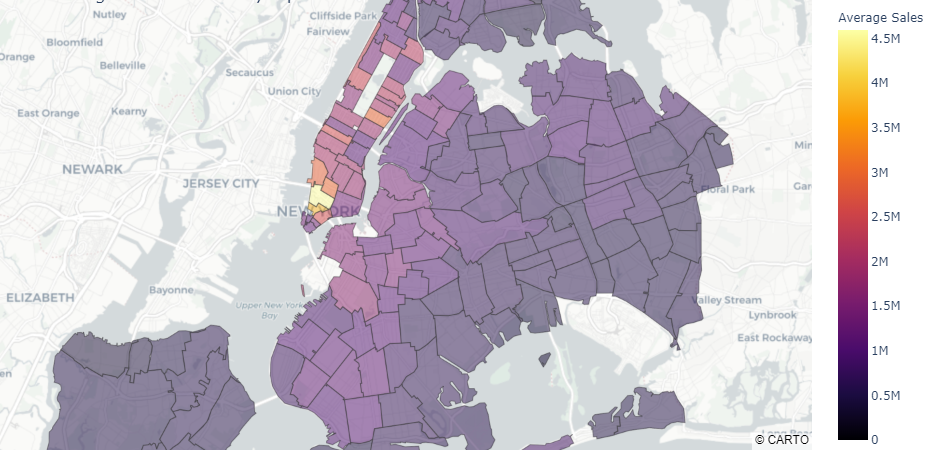

In [17]:
fig = px.choropleth_mapbox(df, geojson=counties, locations=df.index, color='Average Sales',
                           color_continuous_scale="inferno",featureidkey="properties.postalcode",
                           range_color=(0, 4600000),
                           mapbox_style="carto-positron", 
                           zoom=9.9, center = {"lat": 40.7048, "lon": -73.9419},
                           opacity=0.5,
                           width = 800
                           ,title="Average Sales in 2019 by Zip Code"
                           ,labels={'Average Sales 2019':'Average Sales 2019'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
    

In [ ]:
# merge the rent file

df.head()

df.sort_index(inplace=True)

df.index.dtype

In [ ]:
df.index = df.index.astype('int64')
df.index.dtype
df

In [ ]:
cleaned_rent_data.sort_index(inplace=True)

merged_inner = pd.merge(left=df, right=cleaned_rent_data, left_on=df.index, right_on=cleaned_rent_data.index)
# In this case `species_id` is the only column name in  both dataframes, so if we skipped `left_on`
# And `right_on` arguments we would still get the same result

# What's the size of the output data?
merged_inner.shape
merged_inner.isna().sum()
merged_inner


In [ ]:
fig = px.choropleth_mapbox(merged_inner, geojson=counties, locations=merged_inner['key_0'], color='Average Rent 2019',
                           color_continuous_scale="inferno",featureidkey="properties.postalcode",
                           range_color=(1000, 5000),
                           mapbox_style="carto-positron", 
                           zoom=9.9, center = {"lat": 40.7048, "lon": -73.9419},
                           opacity=0.5,
                           width = 800
                           ,title="Average Sales in 2019 by Zip Code"
                           ,labels={'Average Sales 2019':'Average Sales 2019'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
    

In [ ]:
sales_grouped_date = sales_df.groupby(sales_df.index.year).mean()
sales_grouped_date

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig1 = px.line(by_borough, x=by_borough.index, y=by_borough["Average Sales"])
fig1.update_traces(line_color='#DC143C')

fig2 = px.bar(by_borough, x=by_borough.index, y=by_borough["Num of Units Sold"],opacity=0.7)
# fig.add_trace(fig2.data[0])
# fig.show()


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    fig1.data[0],
    secondary_y=False,
)

fig.add_trace(
    fig2.data[0],
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Average Sales and Average Num of Units Sold in NYC Neighborhoods"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Average Sales </b> (express as line)", secondary_y=False)
fig.update_yaxes(title_text="<b>Number of Units Sold</b> (expressed as bars)", secondary_y=True)

fig.show()